# Lab 5. Fuzzy Systems
# Task 5.2 Project Risk Assessment
## Problem Descriptions
Given the project funding and staffing, build a fuzzy system to assess the risk of the project based on the project funding and staff. Firstly, the problem is formulated by specifying the linguistic variables, their corresponding membership functions, and the rules.
1. Linguistic variable:
 *   Project funding: Inadequate, marginal, adequate
 *   Project staffing: Small, large
 *   Risk: Low, normal, high

2. Corresponding membership functions:
![picture](https://github.com/mengheng02/image-file/blob/main/risk%20assessment%20membership%20function.png?raw=true)

 (i). Project funding
    * Inadequate: Start with full membership (1) from 0% to 30%, then decrease linearly to 0 membership at 45%, and remain 0 membership until 100%.
    * Marginal: Start with 0 membership from 0% to 30%, then linearly to full membership at 50%, and decrease linearly back to 0 membership at 70%, remain 0 membership until 100%.
    * Adequate: Start with 0 membership from 0% to 55%, then increase linearly to full membership at 70%, and remain full membership until 100%.

 (ii). Project staffing
    * Small: Start with full membership from 0% to 25%, then decrease linearly to 0 membership at 65%, remain 0 membership until 100%.
    * Large: Start with 0 membership from 0% to 35%, increase linearly to full membership at 75%, and remain full membership until 100%

 (iii). Risk:
    * Low: Start with full membership from 0% to 20%, decrease linearly to 0 membership at 40%, and remain 0 membership afterwards.
    * Normal: Start with 0 membership from 0% to 25%, increase linearly to full membership at 45%, and remain full membership until 55%, then decrease linearly back to 0 membership at 75%, and remain at 0 membership afterwards.
    * High: Start with 0 membership from 0% to 60%, increase linearly to full membership at 80%, and remain full membership afterwards.



3. Rules:
 * Rule 1: IF project funding is adequate OR project staffing is small, THEN risk is low   
 * Rule 2: IF project funding is marginal AND project staffing is large,
THEN risk is normal
 * Rule 3: IF project funding is inadequate, THEN risk is high
 * Rule 4: IF project funding is inadequate AND project staffing is large
 ,THEN risk is high. (optional)




## Implementation and Results

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=bfdbd77532cec2c6891aaef70d566e94fe631d43628d1bab94c9656cfab7f498
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# Linguistic variables for antecedents/consequent
funding = ctrl.Antecedent(np.arange(0, 101, 1), 'funding')
staffing = ctrl.Antecedent(np.arange(0, 101, 1), 'staffing')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# membership functions for each linguistic values
funding['inadequate'] = fuzz.trapmf(funding.universe, [0, 0, 30, 45])
funding['marginal'] = fuzz.trimf(funding.universe, [30, 50, 70])
funding['adequate'] = fuzz.trapmf(funding.universe, [55, 70, 100, 100])
staffing['small'] = fuzz.trapmf(staffing.universe, [0, 0, 25, 65])
staffing['large'] = fuzz.trapmf(staffing.universe, [35, 75, 100, 100])
risk['low'] = fuzz.trapmf(risk.universe, [0, 0, 20, 40])
risk['normal'] = fuzz.trapmf(risk.universe, [25, 45, 55, 75])
risk['high'] = fuzz.trapmf(risk.universe, [60, 80, 100, 100])

#funding.view()
#staffing.view()
#risk.view()

In [ ]:
# Define the rules
rule1 = ctrl.Rule(funding['adequate'] | staffing['small'], risk['low'])
rule2 = ctrl.Rule(funding['marginal'] & staffing['large'], risk['normal'])
rule3 = ctrl.Rule(funding['inadequate'], risk['high'])
#rule4 = ctrl.Rule(funding['inadequate'] & staffing['large'], risk['high'])

# Create the control system and its simulation
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3])
#ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)

Project risk: 66.66529281135837 %


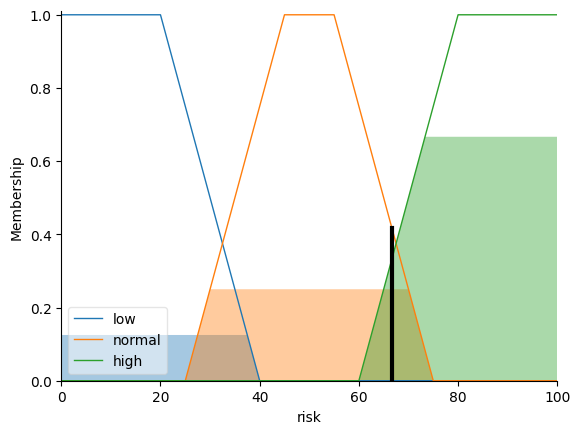

In [ ]:
# Pass inputs to the ControlSystem
ctrl_sim.inputs({'funding': 35, 'staffing': 60})

# Crunch the numbers
ctrl_sim.compute()
print("Project risk:", ctrl_sim.output['risk'], "%")
risk.view(sim=ctrl_sim)


## Discussions
#### Fuzzy system with 3 rules
Given the project funding is rated as 35 out of 100 and project staffing is rated as 60 out of 100, the fuzzy system generates project risks of 66.66%. The project risk is considered as more 'normal' than 'high'. The project risk lies between 'normal' category and 'high' category, but with higher membership in the 'normal' category.
####Fuzzy system with 4 rules

![picture](https://github.com/mengheng02/image-file/blob/main/fuzzy%20diagram%20of%20risk%20assessment%20using%204%20rules.png?raw=true)

Given the same project funding and project staffing as above and evaluated with 4 rules, the project risk remains constant at 66.66%. However if we test the fuzzy system with different project funding and project staffing, the fuzzy system may produces a different project risk compared to the original set of rules. This is because the Mamdani fuzzy inference process aggregates the output of multiple rules, and a new rule can change the aggregating output. Therefore, result changes are dependent on the specific membership functions, rule strengths, and aggregrated rule of the fuzzy system.